In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**7) - \
    2.1*(X**5) + \
    3.9*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect

In [7]:
print(X.shape, y.shape)

(50, 1) (50, 1)


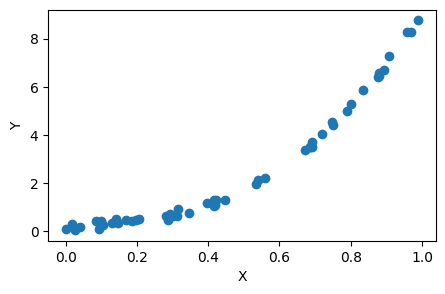

In [8]:
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X,y)

output = model.predict(X)

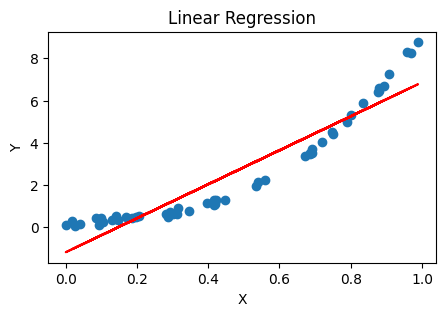

In [14]:
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y)
plt.plot(X, output, color='red')
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [12]:
model.score(X, y) #R2 Score

0.8894270152661328

In [25]:
# creating another feature x^2
X_deg2 = np.hstack([X, X**2])
X_deg2.shape

(50, 2)

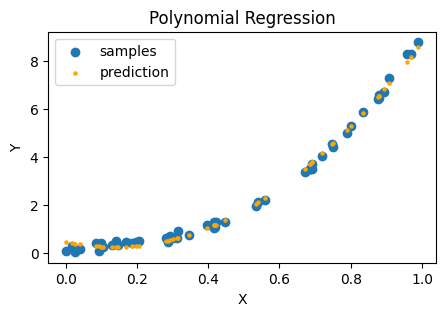

In [20]:
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2,y)

output = model_deg2.predict(X_deg2)

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label = "samples")
plt.scatter(X, output, color='orange', s = 5, label = "prediction")

plt.legend()
plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [24]:
model_deg2.score(X_deg2, y) #R2 Score

0.9960258300323994

In [28]:
# Score looks good.
# However, we can try with higher degrees.
# We'll also need to perform standardization as higher degrees can increase the values significantly 

In [29]:
from sklearn.preprocessing import PolynomialFeatures # Helps creating polynomial features without manually creating
from sklearn.preprocessing import StandardScaler

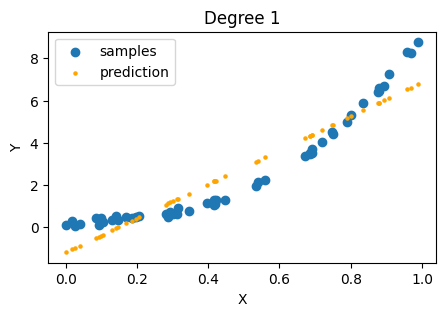

R-square: 0.8894270152661328


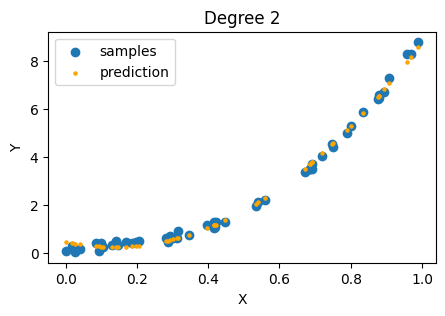

R-square: 0.9960258300323994


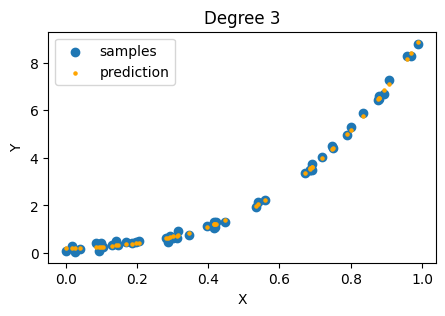

R-square: 0.9983387133053477


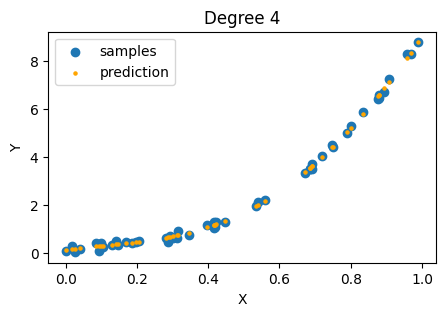

R-square: 0.9985331395020686


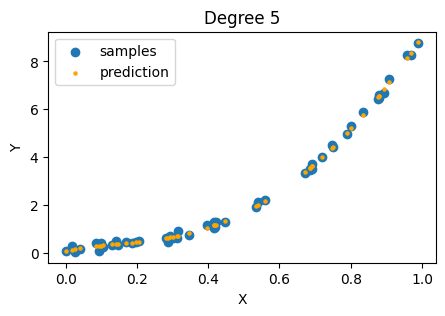

R-square: 0.9985536321686322


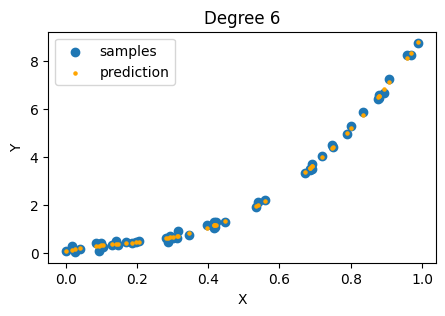

R-square: 0.9985577480465093


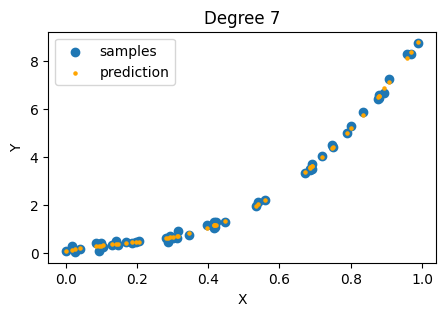

R-square: 0.9985642093885633


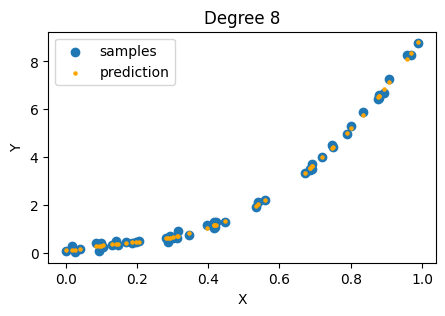

R-square: 0.9985817073609988


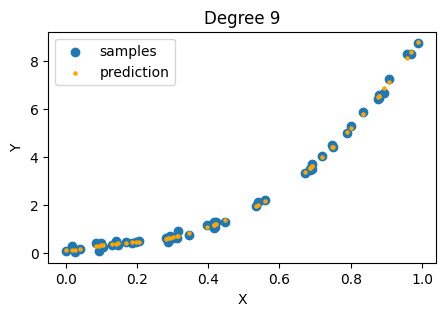

R-square: 0.9986000080217768


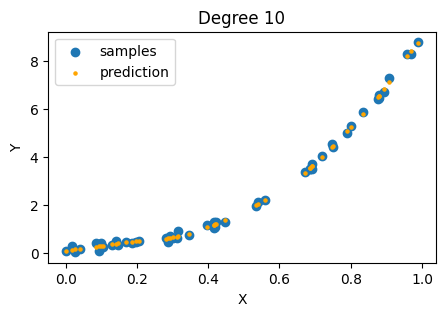

R-square: 0.9986561572863022


In [31]:
scores = []

for i in range(1, 11):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X)

    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)


    # train Linear regression
    model = LinearRegression()
    model.fit(X_poly_scaled,y)

    output = model.predict(X_poly_scaled)

    fig = plt.figure(figsize=(5,3))
    plt.scatter(X, y, label="samples") # original data
    plt.scatter(X, output, label="prediction", color='orange', s = 5) # predictions
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {i}")
    plt.show()

    score = model.score(X_poly_scaled,y)
    print('R-square:', score)

    scores.append(score)

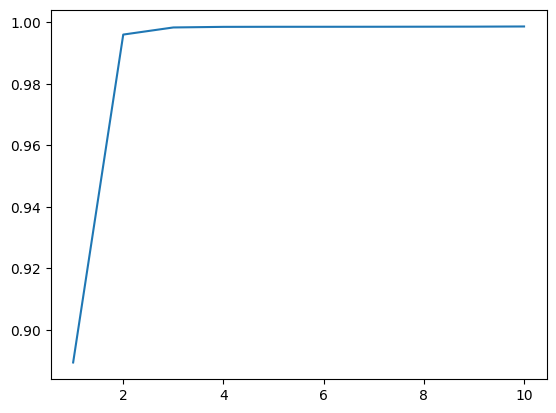

In [32]:
plt.plot(range(1,11), scores)